In [1]:
# Import essential libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset "diabetes.sv" in a datadframe
df=pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [3]:
# Use the describe method and explain the results
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Check for NULL item in the dataframe
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no null data is present

<Axes: xlabel='Outcome', ylabel='count'>

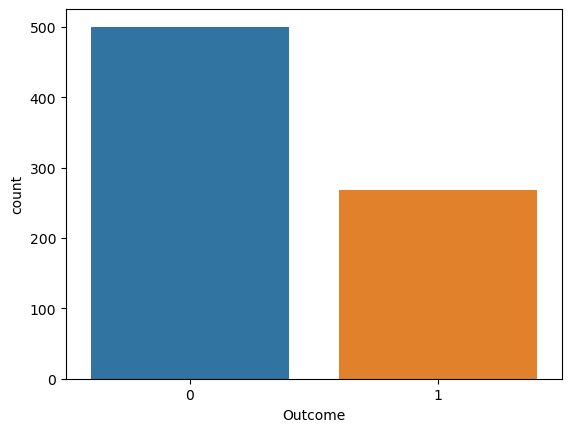

In [5]:
# Check the distribution of the target (Outcome) and show the count and show the distribution ratio
import seaborn as sns
sns.countplot(df,x='Outcome')

there is a class imbalance in the outcome field

In [6]:
# Check the range of data from the above describe method on each feature column
print(df['Outcome'].describe())
print('Counts of data\n',df['Outcome'].value_counts())

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64
Counts of data
 0    500
1    268
Name: Outcome, dtype: int64


In [7]:
# Do the scaling using StandardScaler on the columns
from sklearn.preprocessing import StandardScaler
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']
scl=StandardScaler()
x_data=scl.fit_transform(x)

## Modeling

In [8]:
RANDOM_STATE=np.random.seed(7)

In [9]:
# Load and split the dataset into train, and test
# Note that while splitting try to maintain the ratio of Outcome in the train, and test and show us that ratio (hint: use stratify)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y,random_state=RANDOM_STATE,stratify=y,test_size=0.3)


In [10]:
x_test.shape,x_train.shape

((231, 8), (537, 8))

In [11]:
#to check the ratio in training and test set
a,b=y_test.value_counts()
print('test Ratio = ',a/b)
c,d=y_train.value_counts()
print("train Ratio = ",c/d)

test Ratio =  1.8518518518518519
train Ratio =  1.8716577540106951


## Modeling 1

In [12]:
# Use DecisionTreeClassifer and cross_val_score to get scores on the dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt_clf=DecisionTreeClassifier(max_depth=10,random_state=RANDOM_STATE)
cross_val_scores = cross_val_score(dt_clf, x_data, y, cv=5)
print("Cross-validation scores:")
print(cross_val_scores)

dt_clf.fit(x_train, y_train)

y_pred = dt_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: ',accuracy)
print('Confusion matrix: \n',conf_matrix)
print(class_report)

Cross-validation scores:
[0.66883117 0.67532468 0.68181818 0.80392157 0.74509804]
Accuracy:  0.7272727272727273
Confusion matrix: 
 [[125  25]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       150
           1       0.63      0.53      0.58        81

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



In [13]:
# Get the score mean
print("\nMean cross-validation score:")
print(cross_val_scores.mean())


Mean cross-validation score:
0.7149987267634327


## Modeling 2

The Out-of-Bag (OOB) score is a useful measure in ensemble learning, particularly for algorithms like Bagging (Bootstrap Aggregating) that involve bootstrapping. Here’s what it means:<br>

Out-of-Bag (OOB) Score<br>
Bootstrap Sampling: In Bagging, multiple models (e.g., decision trees) are trained on different subsets of the training data. These subsets are created by randomly sampling the training data with replacement (bootstrap sampling). This means that some samples may be used multiple times in a single subset, while others may not be used at all.

Out-of-Bag Samples: For each model, the samples that are not selected in the bootstrap sample (the ones left out) are called out-of-bag samples. On average, about 1/3 of the training samples are out-of-bag for each model.

OOB Score Calculation: The OOB score is an internal cross-validation method. For each training sample, we can evaluate its performance using only the models for which it was an out-of-bag sample. The final OOB score is the aggregate accuracy of these predictions over all the training samples.

Advantages of OOB Score<br>
Efficient Use of Data: Since OOB samples are part of the training data but not used in training the particular models, they provide a way to validate the model without needing a separate validation set. This makes efficient use of the available data.

<br>Model Evaluation: The OOB score provides an unbiased estimate of the model's performance on unseen data. It’s similar to what you would get from cross-validation but with less computational overhead.

In [14]:
# use BaggingClassifer and for base_estimator use DecisionTreeClassifier
# use n_estimator 100
# use max-samples 80%
# calculate oob score
# set random state in all cases
from sklearn.ensemble import BaggingClassifier
bag_clf=BaggingClassifier(n_estimators=100,max_samples=0.8,random_state=RANDOM_STATE,oob_score=True)


In [15]:
# Fit the model
bag_clf.fit(x_train,y_train)

BaggingClassifier(max_samples=0.8, n_estimators=100, oob_score=True)

In [16]:
#oob score
oob_score = bag_clf.oob_score_
print("Out-of-Bag (OOB) score:")
print(oob_score)


Out-of-Bag (OOB) score:
0.7616387337057728


In [17]:
# calculate the score on test dataset
y_pred = bag_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Test set accuracy:")
print(accuracy)
print("\nClassification report:")
print(class_report)

print("\nConfusion matrix:")
print(conf_matrix)

Test set accuracy:
0.7575757575757576

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       150
           1       0.70      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231


Confusion matrix:
[[132  18]
 [ 38  43]]


In [18]:
# Pass the Baggingmodel classifier to cross_val_score and get the scores and then calculate the mean of the scores.
cross_val_Bag=cross_val_score(bag_clf, x_data, y, cv=5)
print(cross_val_Bag)
print("mean: ",cross_val_Bag.mean())

[0.74025974 0.74675325 0.74025974 0.83660131 0.75816993]
mean:  0.7644087938205585


from this we can see that bagging classifier is better than decision tree classifier

## Modeling 3

In [19]:
# Use RandomForestClassifier
# Pass the classifier to cross_val_score and calculate the scores (e.g. use cv = 5 default)
# Calculate the mean of the scores.
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100,random_state=RANDOM_STATE,oob_score=True)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [20]:
oob_score = rf_clf.oob_score_
print("Out-of-Bag (OOB) score:")
print(oob_score)
y_pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Test set accuracy:")
print(accuracy)
print("\nClassification report:")
print(class_report)

print("\nConfusion matrix:")
print(conf_matrix)

Out-of-Bag (OOB) score:
0.74487895716946
Test set accuracy:
0.7445887445887446

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231


Confusion matrix:
[[131  19]
 [ 40  41]]


In [21]:
#cross validation 
cross_val_rf=cross_val_score(rf_clf, x_data, y, cv=5)
print(cross_val_rf)
print("mean: ",cross_val_rf.mean())

[0.72727273 0.73376623 0.76623377 0.83006536 0.77124183]
mean:  0.7657159833630423


so the random forest classifier works the best compared to decision tree classifier and bagging classifier

## using oversampling to increase the performance of the same randomforest classifier with the same hyperparameters

In [22]:
#now doing the same while performing oversampling of minority class in the outcome feature of the dataset
from sklearn.utils import resample
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]
df_minority_oversampled = resample(
    df_minority, 
    replace=True,    
    n_samples=len(df_majority), 
    random_state=RANDOM_STATE)


In [23]:
df_oversampled = pd.concat([df_majority, df_minority_oversampled])
df_minority_oversampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78,50,32,88,31.0,0.248,26,1
579,2,197,70,99,0,34.7,0.575,62,1
23,9,119,80,35,0,29.0,0.263,29,1
468,8,120,0,0,0,30.0,0.183,38,1
195,5,158,84,41,210,39.4,0.395,29,1
...,...,...,...,...,...,...,...,...,...
458,10,148,84,48,237,37.6,1.001,51,1
270,10,101,86,37,0,45.6,1.136,38,1
26,7,147,76,0,0,39.4,0.257,43,1
143,10,108,66,0,0,32.4,0.272,42,1


In [24]:
#shuffling
df_oversampled = df_oversampled.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)
df_oversampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,178,84,0,0,39.9,0.331,41,1
1,1,128,82,17,183,27.5,0.115,22,0
2,7,181,84,21,192,35.9,0.586,51,1
3,1,133,102,28,140,32.8,0.234,45,1
4,0,119,0,0,0,32.4,0.141,24,1
...,...,...,...,...,...,...,...,...,...
995,2,112,78,50,140,39.4,0.175,24,0
996,2,146,0,0,0,27.5,0.240,28,1
997,2,82,52,22,115,28.5,1.699,25,0
998,7,159,64,0,0,27.4,0.294,40,0


In [25]:
df_oversampled['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

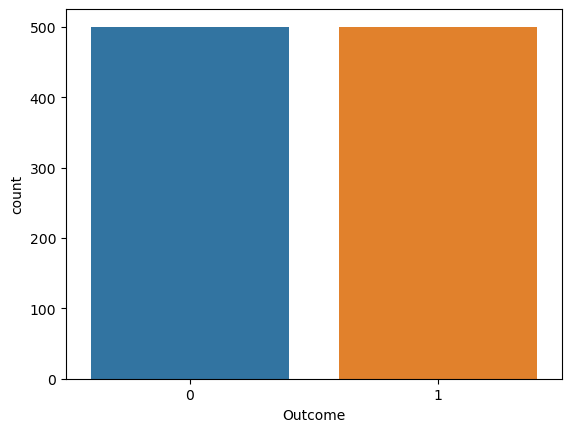

In [29]:
sns.countplot(df_oversampled,x='Outcome')

In [32]:
x=df_oversampled.drop(['Outcome'],axis=1)
y=df_oversampled['Outcome']
scl=StandardScaler()
x_data=scl.fit_transform(x)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y,random_state=RANDOM_STATE,stratify=y,test_size=0.3)

In [34]:
#now if we fit the same randomforest model in upsampled data then,
rf_clf=RandomForestClassifier(n_estimators=100,random_state=RANDOM_STATE,oob_score=True)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [35]:
oob_score = rf_clf.oob_score_
print("Out-of-Bag (OOB) score:")
print(oob_score)
y_pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Test set accuracy:")
print(accuracy)
print("\nClassification report:")
print(class_report)

print("\nConfusion matrix:")
print(conf_matrix)
#cross validation 
cross_val_rf=cross_val_score(rf_clf, x_data, y, cv=5)
print(cross_val_rf)
print("mean: ",cross_val_rf.mean())

Out-of-Bag (OOB) score:
0.8642857142857143
Test set accuracy:
0.8333333333333334

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       150
           1       0.80      0.89      0.84       150

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300


Confusion matrix:
[[116  34]
 [ 16 134]]
[0.875 0.885 0.84  0.84  0.855]
mean:  0.859


### This oversampling has significantly improved the performance as the model performs better than the previous model trained on class imbalanced dataset